In [48]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA

In [43]:
data = pd.read_csv("segmentation data.csv")

In [10]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Correlation Estimate

In [6]:
data.corr() #The values range between -1 and 1

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


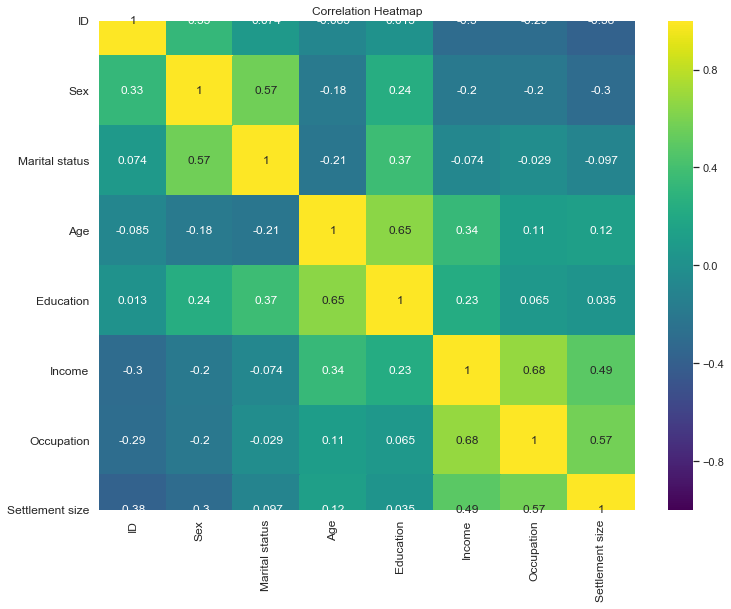

In [21]:
plt.figure(figsize = (12,9))
s = sns.heatmap(data.corr(),annot = True, cmap = "viridis",vmin = -1, vmax = 1) #other color option(RdBu,autumn,rainbow)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

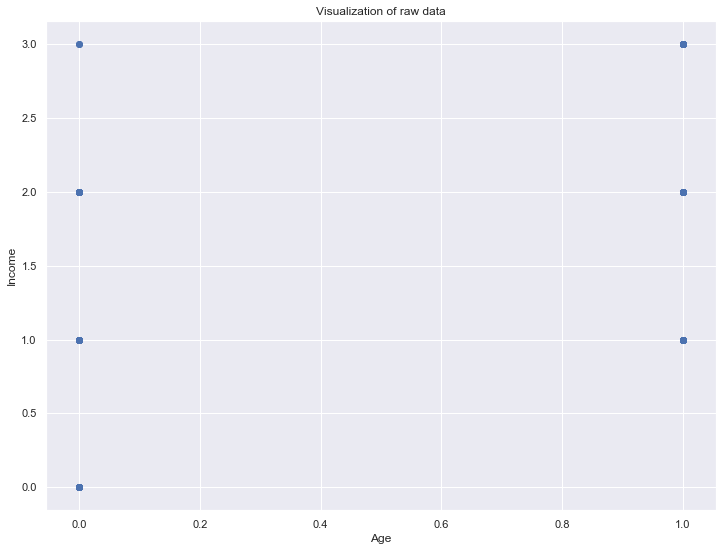

In [25]:
plt.figure(figsize = (12,9))
plt.scatter(data.iloc[:, 2],data.iloc[:, 4])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Visualization of raw data")

# Standardization

In [30]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)

# Hierarchical Clustering

In [34]:
hier_clust = linkage(segmentation_std, method = 'ward')

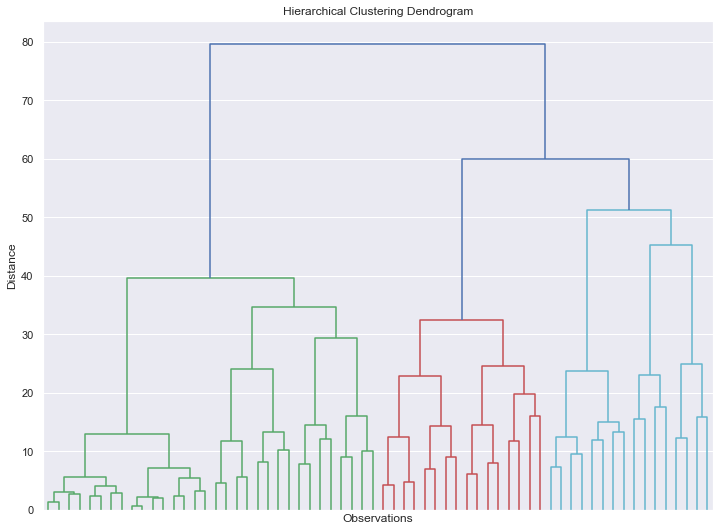

In [40]:
plt.figure(figsize = (12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_clust, truncate_mode = 'level',p = 5,show_leaf_counts = False, no_labels = True) #(color_threshold = 0)
plt.show()


# K-mean Clustering

# PCA

In [49]:
pca = PCA()

In [50]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca.explained_variance_ratio_

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

ValueError: x and y must have same first dimension, but have shapes (7,) and (8,)

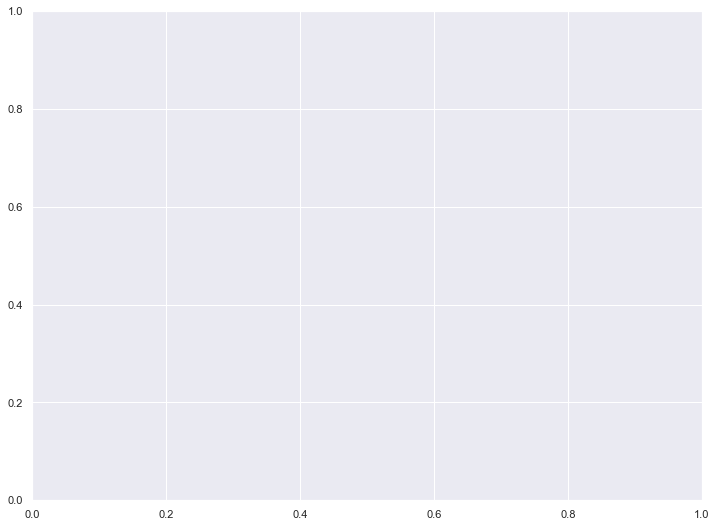

In [55]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title("Explained variance by components")
plt.xlabel("Number of Components")
plt.ylabel("cumulative Explained Variance")


In [56]:
pca = PCA(n_components = 3)


In [57]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# PCA Results

In [58]:
pca.components_

array([[-0.34541048, -0.32858553, -0.18726934,  0.27028302,  0.10451468,
         0.48384405,  0.46168136,  0.45433728],
       [ 0.10723681,  0.4213196 ,  0.47208337,  0.35525956,  0.65278586,
         0.17628427,  0.06136181, -0.0307768 ],
       [ 0.14352194, -0.31795888, -0.4854334 ,  0.61344196,  0.25225754,
        -0.12360121, -0.34456626, -0.26212582]])

In [62]:
df_pca_comp = pd.DataFrame(data = pca.components_,columns = data.columns.values, index = ["Component 1","Component 2" ,"Component 3"])

df_pca_comp

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.345410,-0.328586,-0.187269,0.270283,0.104515,0.483844,0.461681,0.454337
Component 2,0.107237,0.421320,0.472083,0.355260,0.652786,0.176284,0.061362,-0.030777
Component 3,0.143522,-0.317959,-0.485433,0.613442,0.252258,-0.123601,-0.344566,-0.262126


([<matplotlib.axis.YTick at 0x22c635da108>,
 <a list of 3 Text yticklabel objects>)

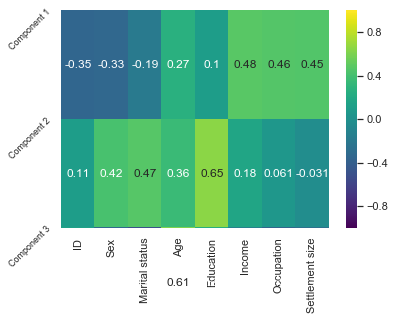

In [63]:
sns.heatmap(df_pca_comp,annot = True, cmap = "viridis",vmin = -1, vmax = 1)
plt.yticks([0,1,2],["Component 1","Component 2" ,"Component 3"],rotation = 45, fontsize = 9)

In [64]:
pca.transform(segmentation_std)

array([[ 2.85978214,  0.93667597,  2.03658632],
       [ 0.94413038,  0.39449213, -2.43378502],
       [-0.02303213, -0.8817974 ,  1.97408269],
       ...,
       [-1.84179778, -2.15868138,  1.1160118 ],
       [-2.71683211,  0.56139001, -0.4762533 ],
       [-2.2097949 , -2.42344957,  0.86070907]])

In [65]:
scores_pca = pca.transform(segmentation_std)

# K-mean clustering with PCA